## Import data and necessary python packages

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# read csv train data file
train_data = pd.read_csv('train.csv')

# read csv test data file
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data quality and missing value assessment

In [3]:
print("The number of samples in train data is: ",train_data.shape[0])
print("The number of samples in test data is: ",test_data.shape[0])

The number of samples in train data is:  891
The number of samples in test data is:  418


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.1 Age misssing value

In [5]:
missing = ( train_data['Age'].isnull().sum() / train_data['Age'].shape[0] ) * 100
print(f"Percentage of missing values in age are: %.2f%%"%missing)

Percentage of missing values in age are: 19.87%


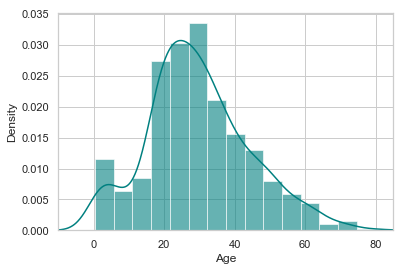

In [6]:
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='Teal', alpha=0.6)
train_data['Age'].plot(kind='density',color='Teal')
ax.set(xLabel='Age')
plt.xlim(-10,85)
plt.show()



Since the graph is right skewed it might give us biased results. Thus older than required. So we have to use median in place of mean

In [7]:
# mean age
print('The mean of Age is %.2f'%(train_data['Age'].mean(skipna=True)))
# median age
print("The median of Age is %.2f"%(train_data['Age'].median(skipna=True)))

The mean of Age is 29.70
The median of Age is 28.00


## 2.2 Cabin missing Value

In [8]:
# cabin missing
print("The percantage of missing cabin is %.2f%%"%((train_data['Cabin'].isna().sum()/train_data.shape[0])*100))

The percantage of missing cabin is 77.10%


## 2.3 Embarked missing

In [9]:
# emabarked missing
print("The percentage of missing embarked is %.2f%%"%((train_data['Embarked'].isna().sum()/train_data.shape[0])*100))


The percentage of missing embarked is 0.22%


It's value is less so we can by the max count of port of embarkation

Boarded passenger boarded port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


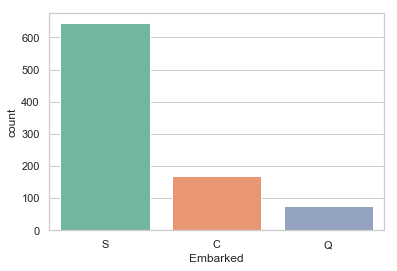

In [10]:
print("Boarded passenger boarded port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(train_data['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train_data,palette='Set2')
plt.show()

In [11]:
print("The value of most port of embarkation is %s."%(train_data['Embarked'].value_counts().idxmax()))

The value of most port of embarkation is S.


Based on the assessment the above the missing values will be fiiled with:
  - Age will be filled with Median age
  - Emabrked will be filled with S
  - Cabin contains too many mssing values and uncertainities.
      better to be left unfilled.

In [12]:
train_data_1 = train_data.copy()
train_data_1['Age'].fillna(train_data_1['Age'].median(skipna=True), inplace=True)
train_data_1['Embarked'].fillna(train_data_1['Embarked'].value_counts().idxmax(), inplace=True)

In [13]:
train_data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

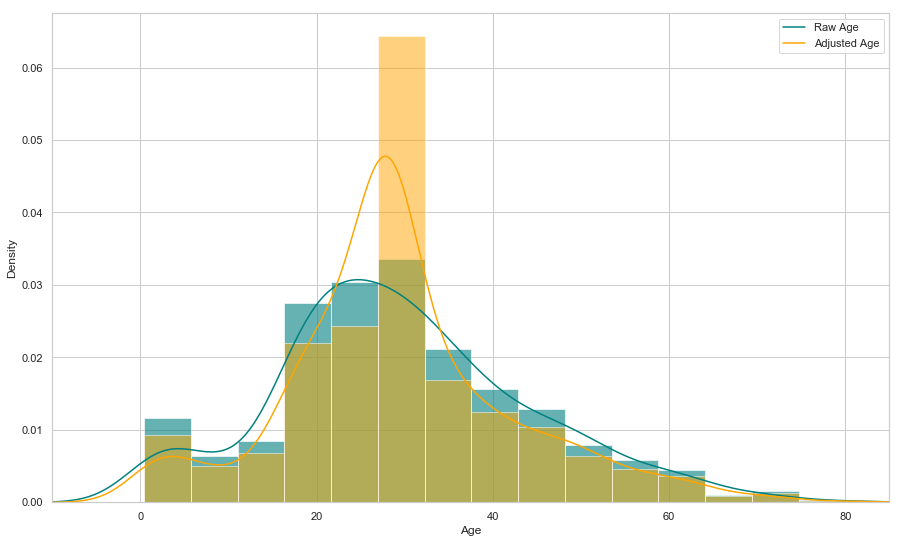

In [14]:
plt.figure(figsize=(15,9))
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='Teal', alpha=0.6)
train_data['Age'].plot(kind='density', color='Teal')
ax = train_data_1['Age'].hist(bins=15, density=True,stacked=True, color='orange', alpha=0.5)
train_data_1['Age'].plot(kind='density', color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.plot();

## Additional Variables

In [15]:
train_data_1['TravellingAlone'] = np.where((train_data_1['SibSp'] + train_data_1['Parch'])>0, 0,1)
train_data_1.drop('SibSp',axis=1)
train_data_1.drop('Parch',axis=1)
# train_data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,NaN,C,0


In [16]:
training = pd.get_dummies(train_data_1,columns=['Pclass','Embarked','Sex'])
training.drop('Name', axis=1, inplace=True)
training.drop('Sex_female',axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train= training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,TravellingAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,NaN,0,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,C85,0,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,NaN,1,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,C123,0,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,1,0,0,1,0,0,1,1


In [17]:
# test_data_1.isna().sum()

In [18]:
test_data_1 = test_data.copy()
test_data_1['Age'].fillna(test_data_1['Age'].median(skipna=True), inplace=True)
test_data_1['Fare'].fillna(test_data_1['Fare'].median(skipna=True), inplace=True)

test_data_1.drop('Cabin', axis=1, inplace=True)

test_data_1['TravellingAlone'] = np.where((test_data_1['SibSp'] + test_data_1['Parch'])>0, 0,1)
test_data_1.drop('SibSp', axis=1, inplace=True)
test_data_1.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data_1, columns=['Pclass','Embarked','Sex'])
testing.drop('Name', axis=1, inplace=True)
testing.drop('PassengerId',axis=1, inplace=True)
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
testing.head()

,Age,Fare,TravellingAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## Exploratory Data Analysis

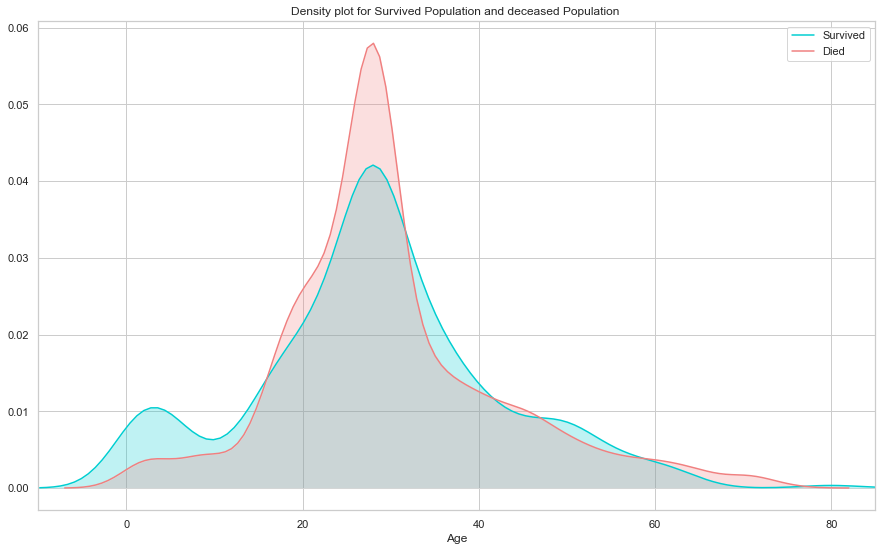

In [19]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(final_train['Age'][final_train['Survived']==1], color='darkturquoise',shade=True)
sns.kdeplot(final_train['Age'][final_train['Survived']==0], color='lightcoral',shade=True)
plt.title('Density plot for Survived Population and deceased Population ')
plt.legend(['Survived','Died'])
ax.set(xLabel='Age')
plt.xlim(-10,85)
plt.plot();

 The population curve for survived and deceased is pretty much the same out of which the young people surviived more.
 
 
 The passengers evidently made way for young people to survive by giving them place on live raft.

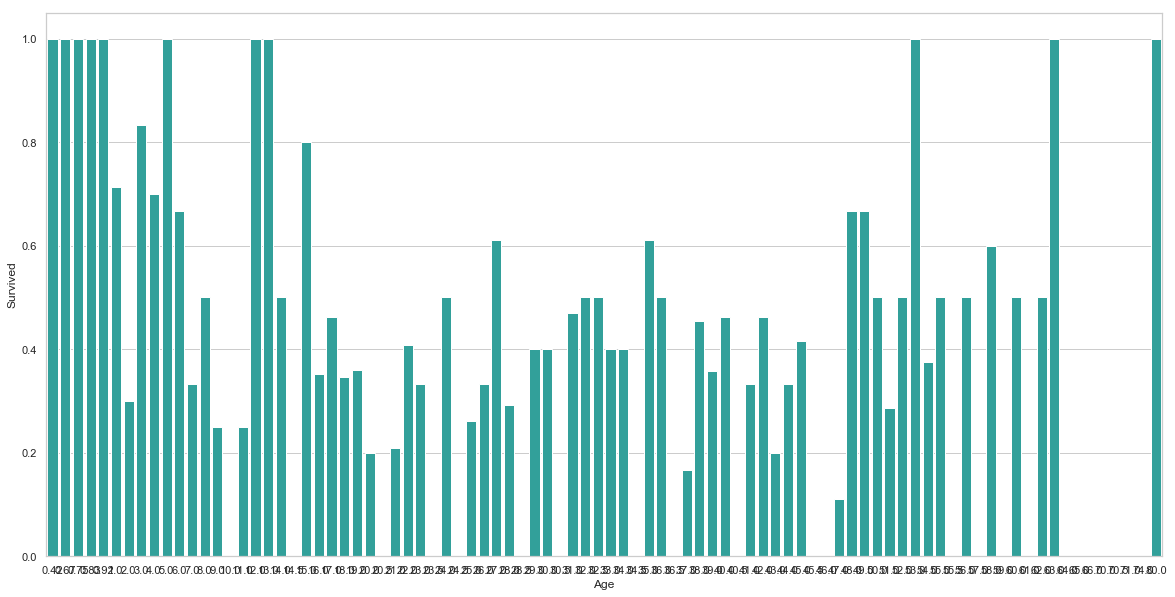

In [20]:
plt.figure(figsize=(20,10))
avg_survival = final_train[['Age','Survived']].groupby(['Age'], as_index=False).mean()
graph = sns.barplot(x='Age',y='Survived',data=avg_survival,color='LightSeaGreen')
plt.show()

It clear from above that survival rate of chidren is pretty high.
better to include a new column

In [21]:
final_train['IsMinor'] = np.where(final_train['Age']<=16, 1, 0 )

final_test['IsMinor'] = np.where(final_test['Age']<=16, 1, 0)

## 3.2 Exploraton of Fare

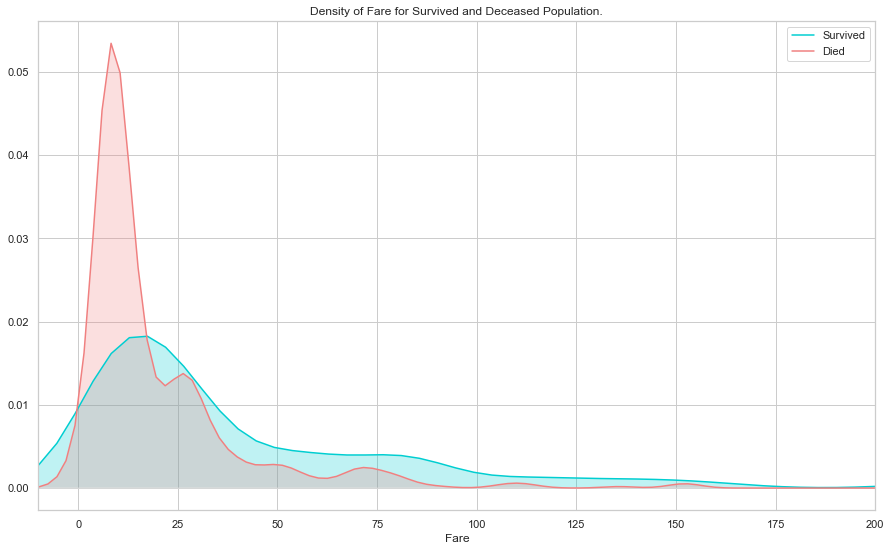

In [22]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(final_train['Fare'][final_train['Survived']==1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Fare'][final_train['Survived']==0], color='lightcoral', shade=True)
plt.title('Density of Fare for Survived and Deceased Population.')
plt.legend(['Survived','Died'])
ax.set(xLabel='Fare')
plt.xlim(-10,200)
plt.plot();

From above we can infere that passengers who had low fare were less likely to survive.
It can be related to the passssenger class.

## Exploration of Travelling Alone

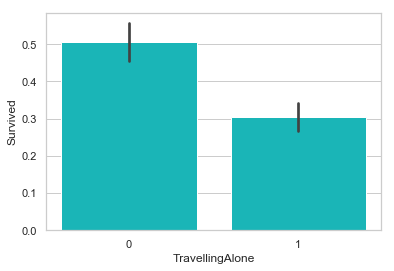

In [23]:
ax1 = sns.barplot('TravellingAlone','Survived', data=final_train,color='darkturquoise')
plt.plot();

It visible that passengers traelling alone were less likely to surive.

## Exploration of passenger class

In [26]:
# final_train

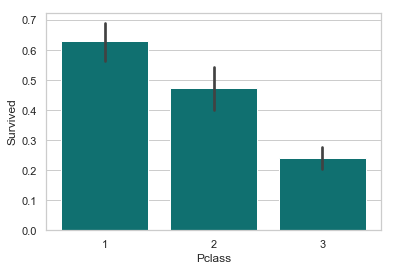

In [27]:
ax2 = sns.barplot('Pclass','Survived', data=train_data, color='teal')
plt.plot();

Thus its likey that 1st class passengers had a better chance of survival.

## Exploration of Embarked Port

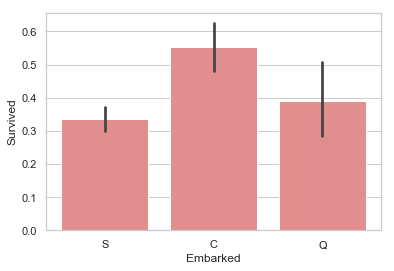

In [28]:
ax = sns.barplot('Embarked','Survived', data=train_data, color='lightcoral')
plt.plot();

Pasengers who boarded Cherborg France are more likely to survive.Whereas People who boarded Southhampton 

were less likely to survive than people who boarded Queenston.

## Exploration of Gender Variable

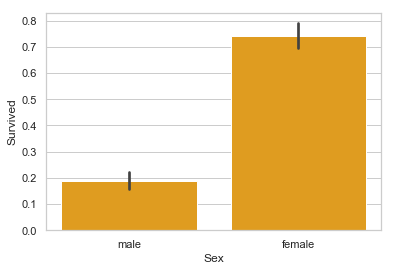

In [29]:
ax = sns.barplot('Sex','Survived', data=train_data, color='orange')
plt.plot();

Thus females were more likely to survive compared to males.

## Logistic Regression and Results

### Recursive feature elimination

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# choosing the required features
cols = ['Age','Fare','TravellingAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']
X = final_train[cols]
y = final_train['Survived']

# Build a logreg and find feature importance
model = LogisticRegression()
# create rfe model and select 8 attributes
rfe = RFE(model, 8)
rfe.fit(X,y)
# summarise the selection of the attributes
print("Selected Features: %s" % list(X.columns[rfe.support_]))

Selected Features: ['Age', 'TravellingAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### Feature ranking with recursive feature elimination and cross validation

Optimal number of features: 9
Selceted features: ['Age', 'Fare', 'TravellingAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 


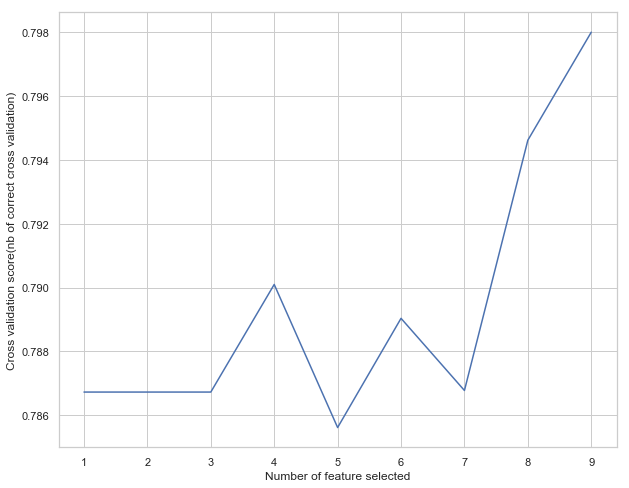

In [45]:
from sklearn.feature_selection import RFECV

# Create A rfe object and compute cross alidation score
# The accuracy is proportional to the number of correct classification
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selceted features: %s " % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,8))
plt.xlabel("Number of feature selected")
plt.ylabel("Cross validation score(nb of correct cross validation)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

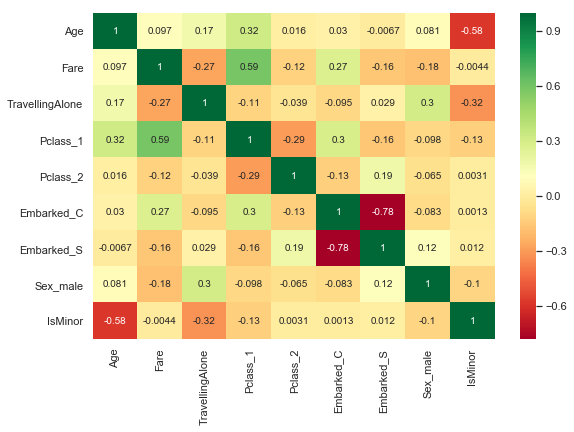

In [53]:
Selected_features= ['Age', 'Fare', 'TravellingAlone', 'Pclass_1', 
'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 

X = final_train[Selected_features]
plt.subplots(figsize=(9,6))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Review of model Evaluation procedures

### Model evaluation based on simple train/test split using train_test_split() function

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X(features) y(response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train test split to split the data
# the random state can be changed later for a different result
# the scores changs a lot thus tesing is a high variance estimate

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logregr = LogisticRegression()
logregr.fit(X_train,y_train)
y_predict = logregr.predict(X_test)
y_predict_proba = logregr.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_predict_proba)

print("train test split results")
print(logregr.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_predict))
print(logregr.__class__.__name__+" log loss is %2.3f" % log_loss(y_test, y_predict_proba))
print(logregr.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

train test split results
LogisticRegression accuracy is 0.777
LogisticRegression log loss is 0.506
LogisticRegression auc is 0.839


In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr>0.95))


Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.839
